In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Enter your desire year and month: 201710
                   sales_price
product                       
Button-Down Shirt    $5,464.20
Super Soft Sweater   $2,249.85
Super Soft Hoodie    $1,800.00
Khaki Pants          $1,780.00
Vintage Logo Tee       $526.35
Sticker Pack           $283.50
Brown Boots            $250.00
Winter Hat             $155.40
------------------------------
Total Monthly Sales:  $12509.3


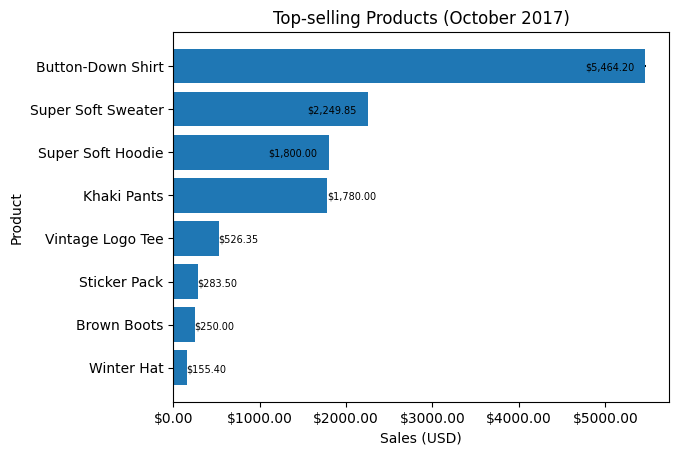

In [133]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
%matplotlib inline

user_input = str(input('Enter your desire year and month: '))
#file_path = '/content/sales_'+user_input+'.csv' 
file_path = 'sales-'+user_input+'.csv'
try:

  #file = "/content/sales_201710.csv"
  df = pd.read_csv(file_path)

  #extract month name
  monthinteger = int(user_input[-2: ])
  month = datetime.date(1900, monthinteger, 1).strftime('%B')

  #extract year
  year = user_input[: 4]
  
  #obtained toal sell price
  group_product = df.groupby('product', sort = True).sum()
  sell_price= group_product.sort_values(by=['sales_price'], inplace=False, ascending=False)
  total_sales_price = "$" + str(round(sum(list(sell_price['sales_price'])), 2)) 
  sell_price= group_product.sort_values(by=['sales_price'], inplace=False, ascending=False)

  # adding dollar sign and descending sales by sum of sales for unique product
  sell_price = group_product.round(2)
  sell_price= group_product.sort_values(by=['sales_price'], inplace=False, ascending=False)
  sales_price_list = list(sell_price['sales_price'])
  sell_price['sales_price'] = sell_price['sales_price'].map('${:,.2f}'.format)

  sell_price = sell_price.drop(['unit_price', 'units_sold', 'sum_of_sales_price'], axis = 1)
  print(sell_price) 
  print('------------------------------')
  print("Total Monthly Sales: ", total_sales_price)
  bar_label = list(sell_price['sales_price'])
  product_list = list(sell_price.index)

  sales_price_list = [round(float(x), 2) for x in sales_price_list]

  # plotting sales of products  
  plt.rcdefaults()
  fig, ax = plt.subplots()

  y_pos = np.arange(len(product_list))

  error = np.random.rand(len(product_list))

  ax.barh(y_pos, sales_price_list, xerr=error, align='center')
  ax.set_yticks(y_pos)
  ax.set_yticklabels(product_list)

  ax.invert_yaxis()  # labels read top-to-bottom
  ax.set_xlabel('Sales (USD)')
  ax.set_ylabel('Product')
  ax.set_title('Top-selling Products ('+month + ' ' + year + ')')
  formatter = ticker.FormatStrFormatter('$%1.2f')
  ax.xaxis.set_major_formatter(formatter)

  totals = []

  for i in ax.patches:
      totals.append(i.get_width())
  total = sum(totals)
  for j, i  in enumerate(ax.patches):
    if j in [0, 1, 2]:
      ax.text(i.get_width()-700, i.get_y()+.5, \
            str(bar_label[j]), fontsize=7, color='black')
    else:
      ax.text(i.get_width()-.2, i.get_y()+.5, \
            str(bar_label[j]), fontsize=7, color='black')

  plt.show()
except:
  print('File not found')